In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [51]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [52]:
df.drop(columns=['student_id','exam_score'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [53]:
df["parental_education_level"] = df["parental_education_level"].fillna(df["parental_education_level"].mode().iloc[0])

df['age'].skew(): 0.0084371397444062


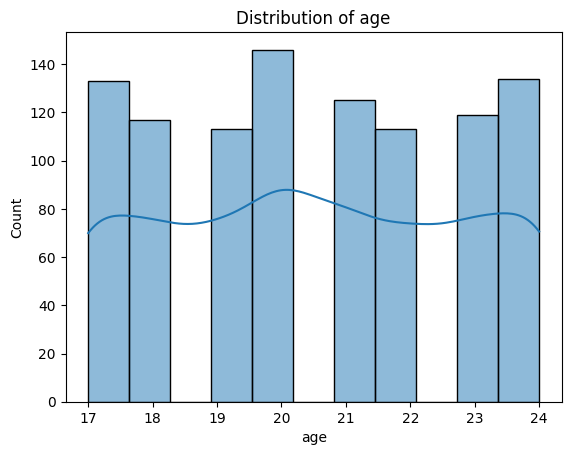

df['study_hours_per_day'].skew(): 0.05425310140811603


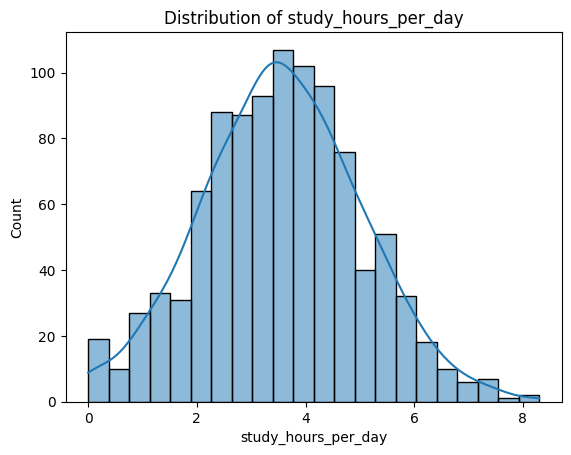

df['social_media_hours'].skew(): 0.11980520318308562


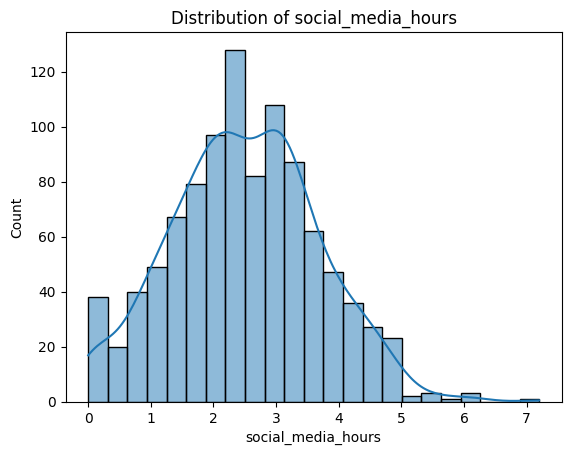

df['netflix_hours'].skew(): 0.23715439564540441


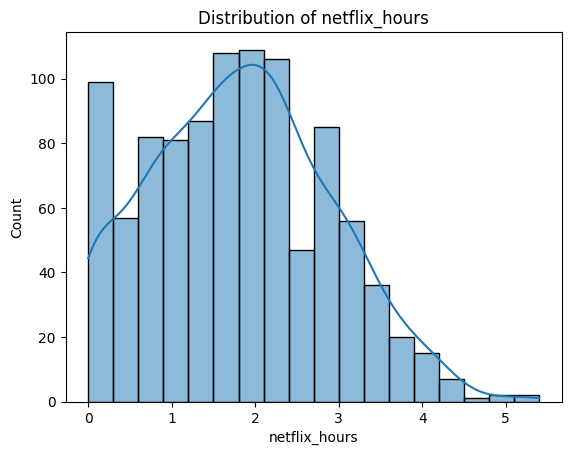

df['attendance_percentage'].skew(): -0.23781042684597256


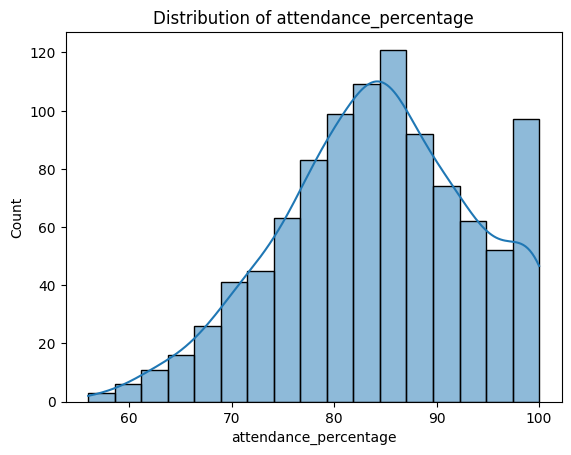

df['sleep_hours'].skew(): 0.09148397227093791


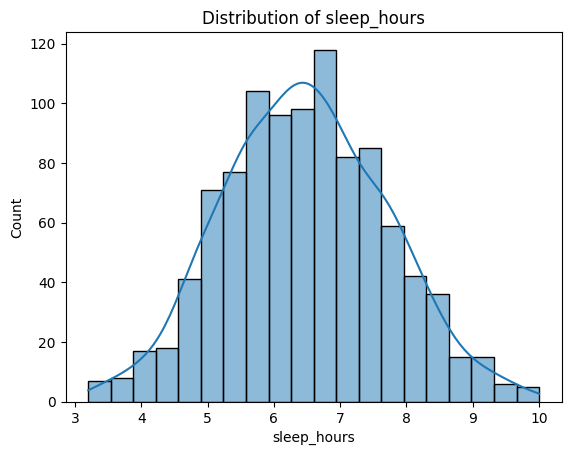

df['exercise_frequency'].skew(): -0.03192297249384373


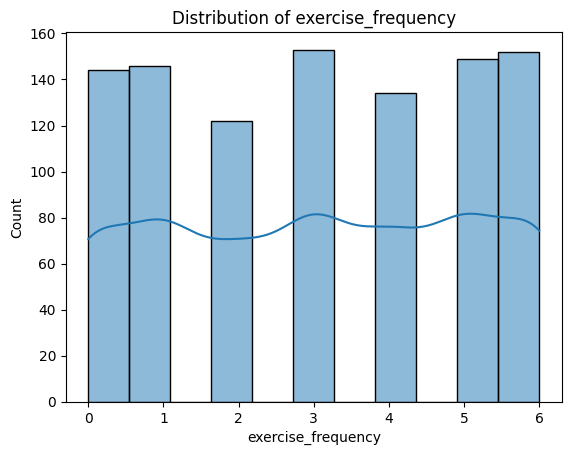

df['mental_health_rating'].skew(): 0.037810699888038285


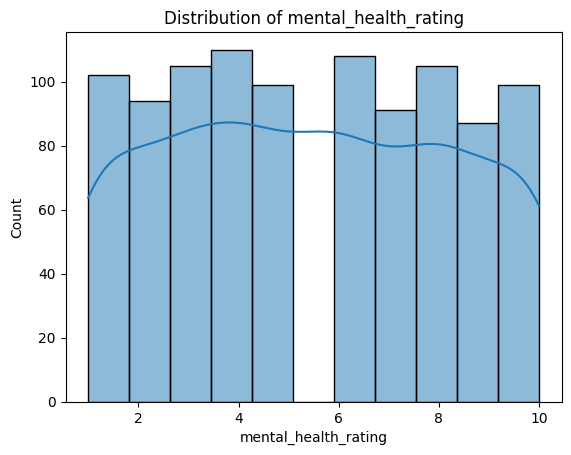

In [54]:
for col in df.select_dtypes(include=['number']).columns:
    print(f"df['{col}'].skew(): {df[col].skew()}")
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [55]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")
    print(df[col].value_counts())

Unique values in 'gender': 3
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
Unique values in 'part_time_job': 2
part_time_job
No     785
Yes    215
Name: count, dtype: int64
Unique values in 'diet_quality': 3
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
Unique values in 'parental_education_level': 3
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64
Unique values in 'internet_quality': 3
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
Unique values in 'extracurricular_participation': 2
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


In [56]:
df["part_time_job"] = df["part_time_job"].astype(bool)
df["extracurricular_participation"] = df["extracurricular_participation"].astype(bool)

In [57]:
df["internet_quality"] = df["internet_quality"].map({"Poor": 1, "Average": 2, "Good": 3}).astype(int)
df["parental_education_level"] = df["parental_education_level"].map({"High School": 1, "Bachelor": 2, "Master": 3}).astype(int)
df["diet_quality"] = df["diet_quality"].map({"Poor": 1, "Good": 2, "Fair": 3}).astype(int)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   bool   
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   int32  
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       1000 non-null   int32  
 11  internet_quality               1000 non-null   int32  
 12  mental_health_rating           1000 non-null   in

In [61]:
df = pd.get_dummies(df, columns=["gender"])
df.drop(columns=["gender_Other"], inplace=True)
df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,gender_Female,gender_Male
0,23,0.0,1.2,1.1,True,85.0,8.0,3,6,3,2,8,True,True,False
1,20,6.9,2.8,2.3,True,97.3,4.6,2,6,1,2,8,True,True,False
2,21,1.4,3.1,1.3,True,94.8,8.0,1,1,1,1,1,True,False,True
3,23,1.0,3.9,1.0,True,71.0,9.2,1,4,3,3,1,True,True,False
4,19,5.0,4.4,0.5,True,90.9,4.9,3,3,3,3,1,True,True,False


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   study_hours_per_day            1000 non-null   float64
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   bool   
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   int32  
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   int32  
 10  internet_quality               1000 non-null   int32  
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   bo

In [63]:
scaler = StandardScaler()
for col in df.select_dtypes(include=['number']).columns:
    df[col] = scaler.fit_transform(df[[col]])

In [64]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-0.636563,-2.192818
1,-0.933290,2.367842
2,-1.376081,-0.132763
3,0.685901,-3.665109
4,2.492530,1.113198


In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Explained variance by fisrt principal: {explained_variance[0]}')
print(f'Explained variance by two principals: {explained_variance[0] + explained_variance[1]}')

# Two principal components doesn't explain much variance, let's see how many components are needed to explain 90% variance

Explained variance by each component: [0.10092382 0.09699951]
Explained variance by fisrt principal: 0.1009238199543995
Explained variance by two principals: 0.19792333471047108


In [ ]:
# Store explained variance for different numbers of components
explained_variances = []

# Loop over 1 to number of features
for n in range(1, df.shape[1] + 1):
    pca = PCA(n_components=n)
    pca.fit(df)
    explained_variance = pca.explained_variance_ratio_.sum()
    explained_variances.append((n, explained_variance))
    print(f"Number of Components: {n}, Cumulative Explained Variance: {explained_variance:.4f}")

# 11 components are good choice


Number of Components: 1, Cumulative Explained Variance: 0.1009
Number of Components: 2, Cumulative Explained Variance: 0.1979
Number of Components: 3, Cumulative Explained Variance: 0.2918
Number of Components: 4, Cumulative Explained Variance: 0.3833
Number of Components: 5, Cumulative Explained Variance: 0.4707
Number of Components: 6, Cumulative Explained Variance: 0.5559
Number of Components: 7, Cumulative Explained Variance: 0.6398
Number of Components: 8, Cumulative Explained Variance: 0.7225
Number of Components: 9, Cumulative Explained Variance: 0.8033
Number of Components: 10, Cumulative Explained Variance: 0.8815
Number of Components: 11, Cumulative Explained Variance: 0.9574
Number of Components: 12, Cumulative Explained Variance: 0.9983
Number of Components: 13, Cumulative Explained Variance: 1.0000
Number of Components: 14, Cumulative Explained Variance: 1.0000
Number of Components: 15, Cumulative Explained Variance: 1.0000


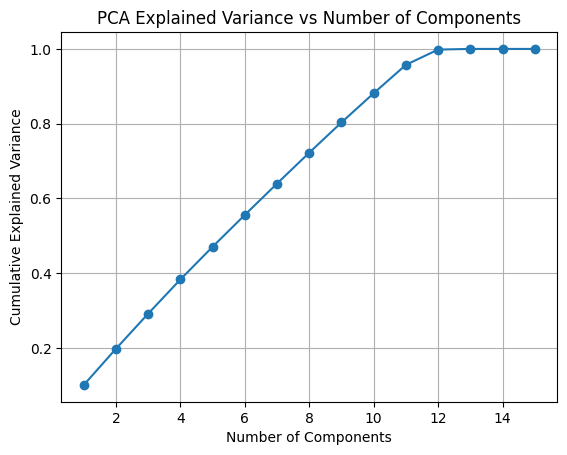

In [ ]:
# Plot explained variance vs number of components
components = [x[0] for x in explained_variances]
variance = [x[1] for x in explained_variances]

plt.plot(components, variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs Number of Components")
plt.grid(True)
plt.show()


In [68]:
# Apply PCA
pca = PCA(n_components=11)
pca_result = pca.fit_transform(df)
df_pca = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(11)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.636563,-2.192818,-1.693039,0.926454,-0.622153,-0.483204,-0.735661,0.875674,-0.476422,-0.258692,2.454515
1,-0.933290,2.367842,0.067967,-0.315254,0.824722,0.506769,1.345422,-0.205293,2.026120,0.445400,0.339533
2,-1.376081,-0.132763,0.510843,2.317958,-0.480300,-0.712354,-1.791036,-1.181915,-0.646323,-0.061614,-1.567521
3,0.685901,-3.665109,0.726546,1.878745,-1.453417,-0.951359,0.732972,-0.724973,-0.563578,-0.231838,-0.493278
4,2.492530,1.113198,0.414578,-0.069436,-0.620408,-2.034041,0.887320,-1.068813,0.608422,-0.593249,0.736854


In [73]:
# Apply Kmeans clustering for df
# Elbow Method - Find optimal number of clusters
k_range = range(1, 100,5)
wcss_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss_values.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for k > 1)
    if k > 1:
        score = silhouette_score(df, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)


([<matplotlib.axis.XTick at 0x222d4e21100>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

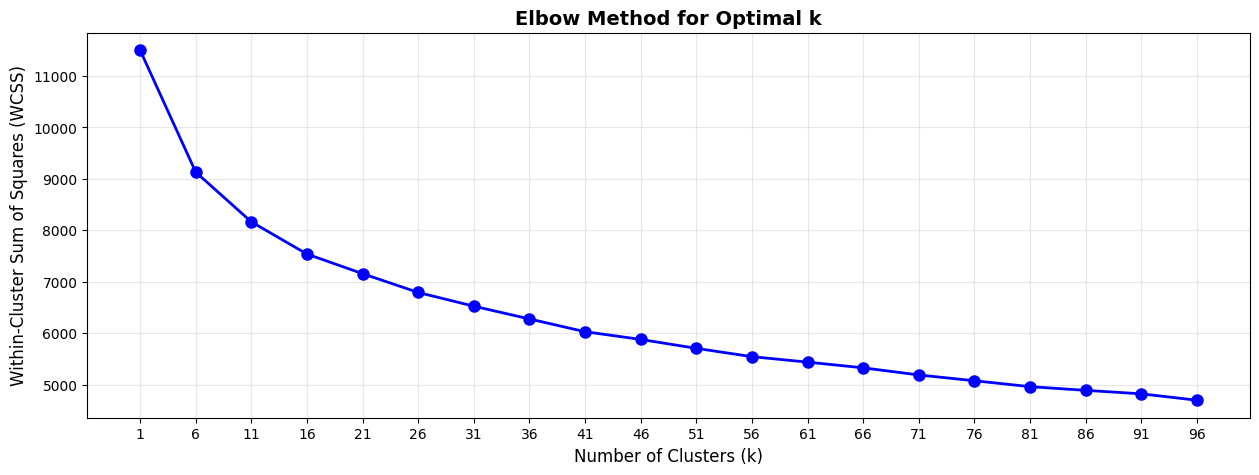

In [74]:
# Plot Elbow Curve
plt.figure(figsize=(15, 5))

plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

([<matplotlib.axis.XTick at 0x222d1e56570>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

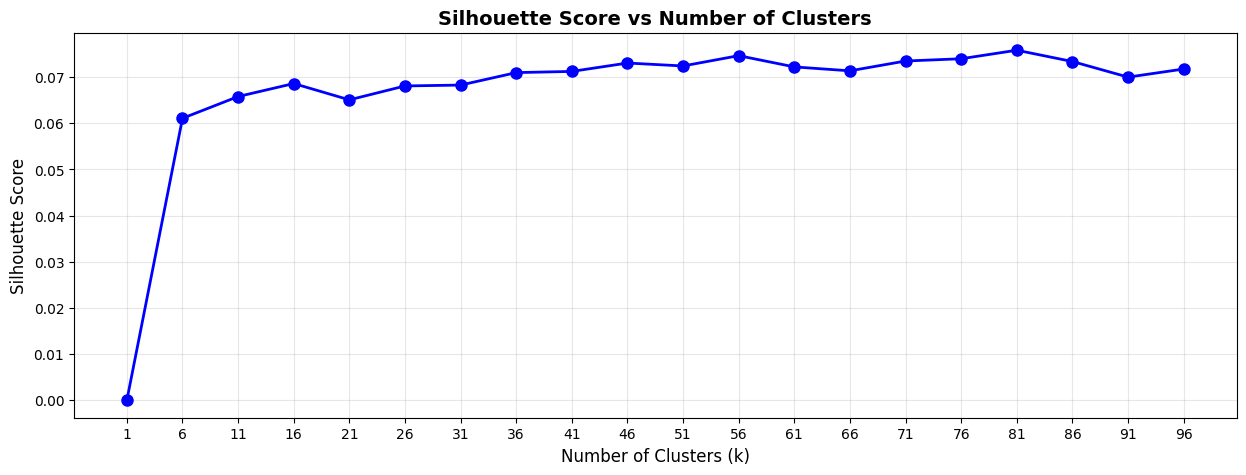

In [75]:
# Plot Silhouette Scores
plt.figure(figsize=(15, 5))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

In [76]:
# Apply KMeans to df_pca
# Elbow Method - Find optimal number of clusters
k_range = range(1, 100,5)
wcss_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    wcss_values.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for k > 1)
    if k > 1:
        score = silhouette_score(df_pca, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)


([<matplotlib.axis.XTick at 0x222d4e86660>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

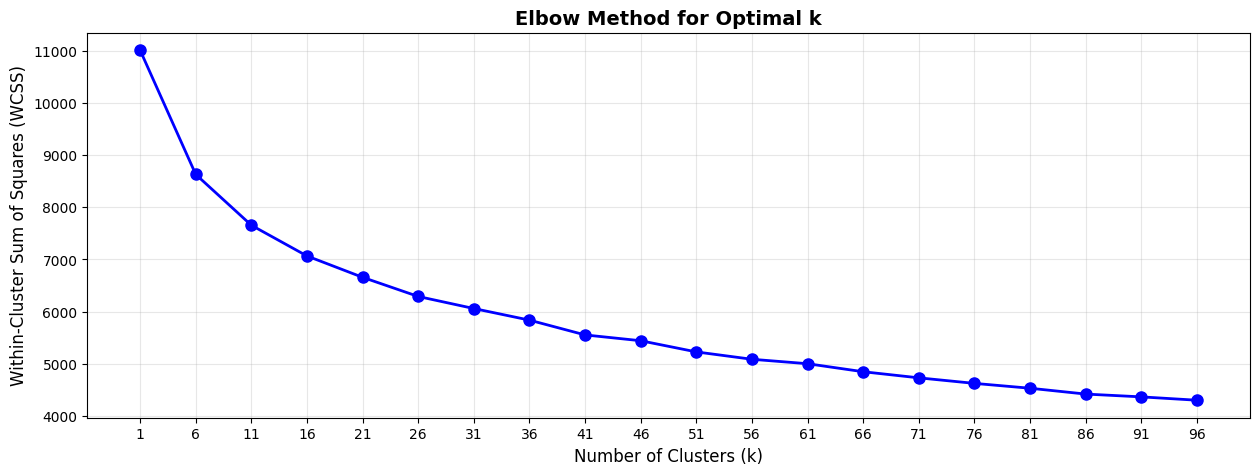

In [77]:
# Plot Elbow Curve
plt.figure(figsize=(15, 5))

plt.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

([<matplotlib.axis.XTick at 0x222d3700320>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96')])

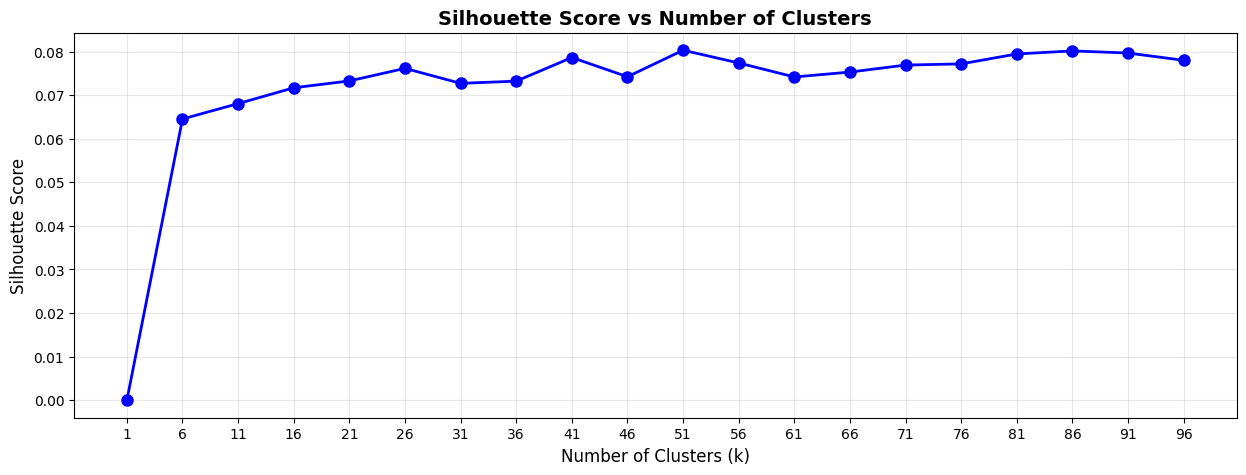

In [78]:
# Plot Silhouette Scores
plt.figure(figsize=(15, 5))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

In [94]:
# Apply DBSCAN to df_pca
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit(df_pca)
labels = dbscan.labels_
pd.Series(labels).value_counts()

0    1000
Name: count, dtype: int64

In [93]:
# Apply DBSCAN to df_pca
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan.fit(df)
labels = dbscan.labels_
pd.Series(labels).value_counts()

-1    1000
Name: count, dtype: int64